<a href="https://colab.research.google.com/github/arnavtiet/kmeans-labAssignment/blob/main/kmeans_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns
from scipy.stats import mstats



In [3]:
# Load the Wine dataset
data = load_wine()
X = data.data
y = data.target

In [4]:
# Step 1: Data Preprocessing (Standardization)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [5]:
# Step 2: Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)


KMeans(n_clusters=3, random_state=42)

In [6]:
predictions = kmeans.predict(X_scaled)

In [7]:
sil_score = silhouette_score(X_scaled, predictions)
print(f'Silhouette Score: {sil_score:.3f}')

Silhouette Score: 0.285


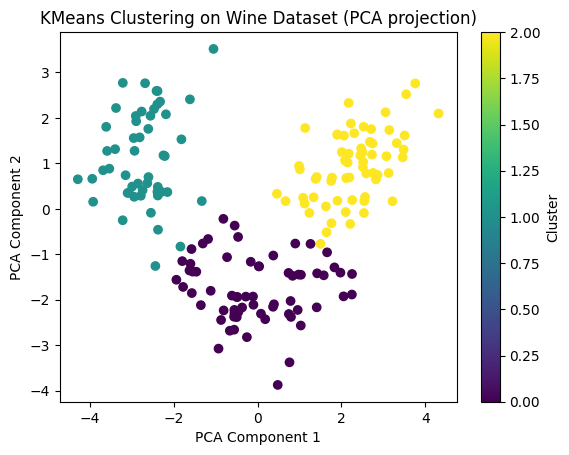

In [8]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=predictions, cmap='viridis')
plt.title('KMeans Clustering on Wine Dataset (PCA projection)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()



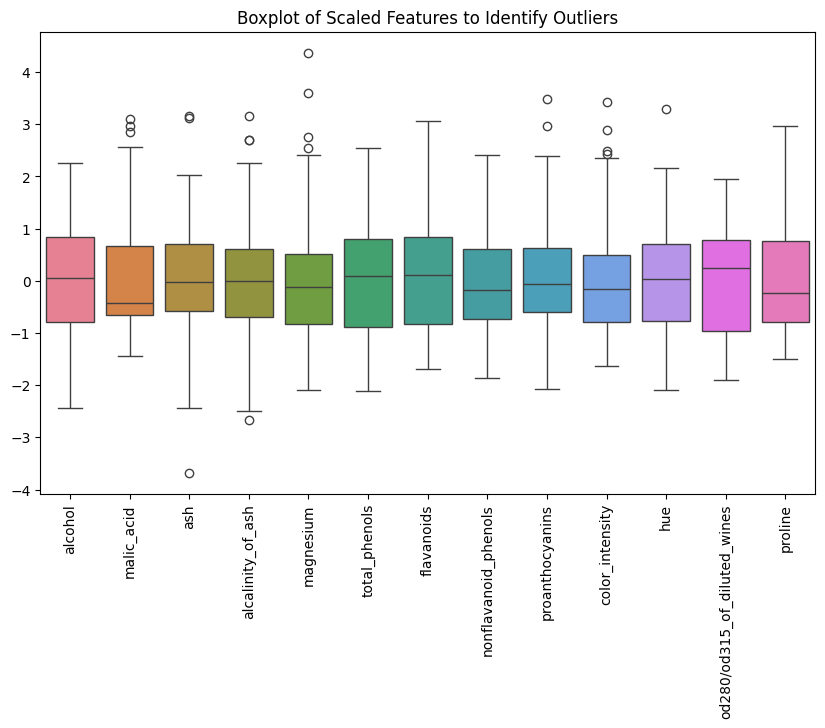

In [9]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=pd.DataFrame(X_scaled, columns=data.feature_names))
plt.title('Boxplot of Scaled Features to Identify Outliers')
plt.xticks(rotation=90)
plt.show()


In [10]:
kmeans_filtered = KMeans(n_clusters=3, random_state=42)
kmeans_filtered.fit(X_filtered)
# Method 1: Capping (Winsorization)
X_capped = mstats.winsorize(X_scaled, limits=[0.05, 0.05])  # Limit outliers at 5% from both tails

# Method 2: Removal of outliers (using Interquartile Range)
Q1 = np.percentile(X_scaled, 25, axis=0)
Q3 = np.percentile(X_scaled, 75, axis=0)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

mask = np.all((X_scaled >= lower_bound) & (X_scaled <= upper_bound), axis=1)

# Apply the mask to filter out outliers
X_filtered = X_scaled[mask]

# Display the shape of data after removal
print(f"Original shape: {X_scaled.shape}, After outlier removal: {X_filtered.shape}")




Original shape: (178, 13), After outlier removal: (161, 13)


In [11]:

predictions_filtered = kmeans_filtered.predict(X_filtered)
sil_score_filtered = silhouette_score(X_filtered, predictions_filtered)
print(f'Silhouette Score after outlier handling: {sil_score_filtered:.3f}')



Silhouette Score after outlier handling: 0.309


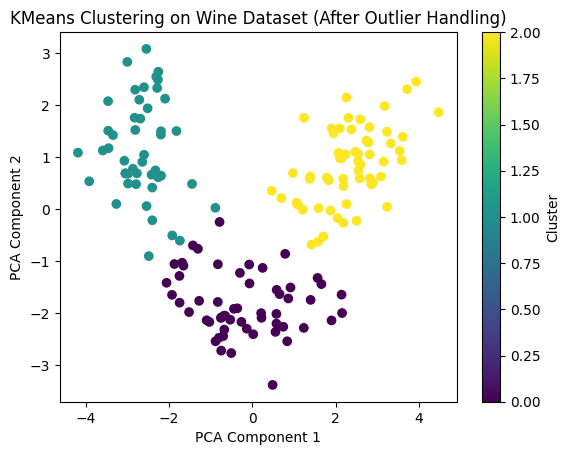

In [12]:
X_pca_filtered = pca.fit_transform(X_filtered)
plt.scatter(X_pca_filtered[:, 0], X_pca_filtered[:, 1], c=predictions_filtered, cmap='viridis')
plt.title('KMeans Clustering on Wine Dataset (After Outlier Handling)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()